In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke


### Deriving limits

In [2]:

Z, P, V, A, B, R, T = sp.symbols('Z P V A B R T')



V = (Z*R*T)/P  # define v in terms of Z
dpdv = -(R*T)/(V-B)**2 + A/T**0.5 * (2*V+B)/(V**2 + B*V)**2  # hand diffrentitated Redlich kwong EOS wrt V
dpdv

A*(B + 2*R*T*Z/P)/(T**0.5*(B*R*T*Z/P + R**2*T**2*Z**2/P**2)**2) - R*T/(-B + R*T*Z/P)**2

In [3]:
# Hand diffrentiated compressibility when P is substituted for the redlich kwong EOS
dzdv = -V/(V-B)**2 + 1/(V-B) + A/((R*T**1.5)*(V+B)**2)

In [4]:
# performing chain rule to cancel out diffrential volumes and get dz/dp

dzdp = (1/dpdv)*(dzdv)
dzdp = sp.simplify(dzdp)
dzdp

dzdp = sp.simplify(dzdp) #gradient
dzdp

-R*T**1.0*Z**2*(-A*P*(B*P - R*T*Z)**2 + R**2*T**2.5*Z*(B*P + R*T*Z)**2 + R*T**1.5*(B*P - R*T*Z)*(B*P + R*T*Z)**2)/(P*(A*P*(B*P - R*T*Z)**2*(B*P + 2*R*T*Z) - R**3*T**3.5*Z**2*(B*P + R*T*Z)**2))

### Limit to 0

In [5]:
# Limit to 0
# P = 0 ,Z = 1
lim_to_0 = sp.limit(dzdp, P, 0)
lim_to_0 = sp.limit(lim_to_0, Z, 1)

lim_to_0 = sp.simplify(lim_to_0)

lim_to_0

-A/(R**2*T**(5/2)) + B/(R*T)

### Limit to infinity

In [6]:

lim_to_inf = sp.limit(dzdp, P, sp.oo)
lim_to_inf = sp.simplify(lim_to_inf)
lim_to_inf

0

### Solving the redlich kwong polynomial in terms of compressibility  in terms of reduced pressures and temperatures by finding real roots

In [7]:
import numpy as np

def find_rootsZ(Pr, Tr):
    # Initialize a matrix to store Z values
    Z_matrix = np.zeros((len(Pr), len(Tr)), dtype=float)

    # Loop through each P value
    for i in range(len(Pr)):
        # Loop through each T value
        for j in range(len(Tr)):
            # Coefficients of the cubic equation for Z
            coeffs = ([1.0, -1.0, Pr[i]/Tr[j] * (0.42748/Tr[j]**1.5 - 0.08664
                      - 0.007506* Pr[i]/Tr[j]), -0.03704 * Pr[i]**2/Tr[j]**3.5])

            # Find the roots of the cubic equation
            roots = np.roots(coeffs)

            # Choose the real root (assuming there is only one real root)
            real_roots = roots[np.isreal(roots)].real

            # Use the real root as Z and store in the matrix
            Z_matrix[i, j] = real_roots[0]

    return Z_matrix



### Defining Pr and Tr array to maintain universal approach

In [8]:

Pr= np.linspace(0.1,70,1000)
Tr = np.array([1,1.1,1.2,1.3,1.4,1.5,1.75,2.0,2.5])
Z_vals = find_rootsZ(Pr,Tr)


### Plotting

<Figure size 800x600 with 0 Axes>

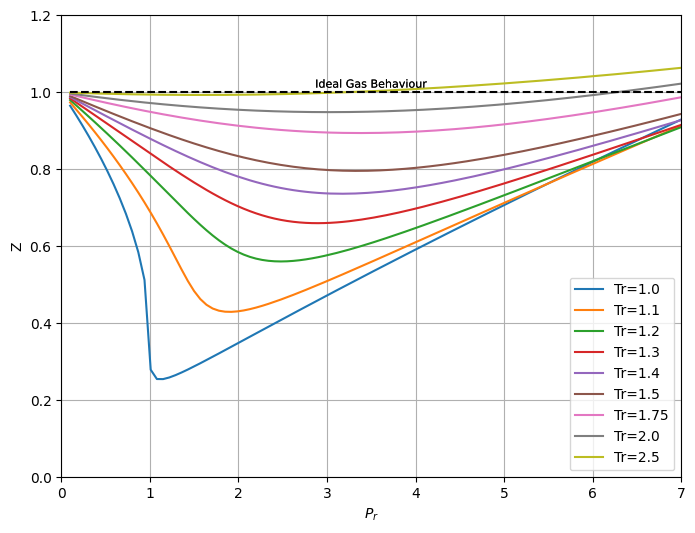

In [9]:
plt.figure(figsize=(8, 6))
y_ideal = np.linspace(1,1,1000)

y_lim = -0.34084*Pr + 1
plt.figure(figsize=(8, 6))
for j in range(len(Tr)):
    plt.plot(Pr, Z_vals[:, j], label=f'Tr={Tr[j]}')
plt.plot(Pr,y_ideal,'k--')
plt.xlabel('$P_r$')
plt.ylabel('Z')
path_effect = withStroke(linewidth=0, foreground='black')
plt.text(*(3.5,1.02), 'Ideal Gas Behaviour', path_effects=[path_effect], rotation=0, ha='center', va='center',fontsize=8)

#plt.title('Compressibility vs $P_{r}$ for different $T_r$')
plt.legend()
plt.ylim(0,1.2)
plt.xlim(0,7)
plt.grid()
plt.show()
